#Section 8

Ai Tools In StructureBioinformatics(AlphaFold)

#Content


-A.ProtBERT(a protein language model from Rostlab)

-B.AI & Deep Learning for Protein Structure & Function Prediction(AlphaFold)

In [ ]:
!pip install biopython
from Bio.SeqUtils.ProtParam import ProteinAnalysis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 25.4 MB/s eta 0:00:00


# A.ProtBERT, a protein language model from Rostlab
 tokenizes an amino acid sequence, and passes it through the model to extract features.


 ProtBERT model does not classify sequences or assign labels directly—it provides numerical embeddings (feature representations) for your protein sequence. If you want to classify sequences (e.g., protein function, structure, or family), you need to train a separate model on top of these embeddings.

In [ ]:
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("Rostlab/prot_bert")
model = AutoModel.from_pretrained("Rostlab/prot_bert")

sequence = "MKTIIALSYIFCLVFA"
inputs = tokenizer(sequence, return_tensors="pt")
output = model(**inputs)

print(output.last_hidden_state.shape)  # Features for ML models


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/361 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/81.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

torch.Size([1, 3, 1024])


Understanding the Output
output.last_hidden_state

This is a tensor of embeddings (numerical representation) for each token in the sequence.
Shape: (batch_size, sequence_length, hidden_dim), usually (1, N, 1024), where:

1 = batch size

N = number of tokens (depends on sequence length)

1024 = embedding size (ProtBERT’s feature dimension)

In [ ]:
print(output.last_hidden_state.shape)  # Features for ML models

torch.Size([1, 3, 1024])


In [ ]:
print(output.last_hidden_state)

tensor([[[-0.1096,  0.0474, -0.0857,  ..., -0.0035, -0.0569,  0.0918],
         [-0.0628,  0.0624, -0.0855,  ...,  0.0178, -0.0978,  0.0628],
         [-0.1252,  0.0657, -0.1055,  ..., -0.0381,  0.0185,  0.0819]]],
       grad_fn=<NativeLayerNormBackward0>)


We can use this features as Xtrain in ml model to
know

Protein Function Prediction (e.g., enzyme/non-enzyme)

Protein Family Classification (e.g., kinases, transporters)

Subcellular Localization (e.g., nucleus, cytoplasm)

Disease Association (e.g., pathogenic vs. non-pathogenic proteins)

 # B.AI & Deep Learning for Protein Structure & Function Prediction

Modern tools use AI instead of BLAST for faster and more accurate predictions.

🚀 AlphaFold & ESMFold (2025 Versions)
AlphaFold 3 (by DeepMind): More precise 3D structure prediction, including protein-ligand and protein-RNA interactions.

ESMFold (by Meta AI): Uses transformers (like GPT) for ultra-fast protein folding prediction without requiring BLAST-like comparisons.

#ColabFold and AlphaFold2 Colab: An overview and comparison

ColabFold and AlphaFold2 Colab are online implementations of AlphaFold2. All operations take place in the cloud, so you can use the software without installing it on your own computer. Both systems are based on Colab (short for Colaboratory): a system that enables you to write and execute Python in your browser.


..The AlphaFold2 Colab is a simplified version of AlphaFold2. It only uses a portion of the BFD (Big Fantastic Database) dataset and does not use homologous structures as templates. As a result, its accuracy is marginally lower than the full version of AlphaFold2. Users also cannot customise structure predictions by varying the parameters.

..ColabFold is a community implementation of a Colab for running AlphaFold2. It offers many more adjustable parameters than AlphaFold2 Colab, such as the depth of the MSA and the number of recycles. Furthermore, ColabFold uses quick MSA preparation via the MMseqs2 server. You can also use a custom MSA as input and supply templates (Mirdita et al, 2022).

 **simple summary** of the key points about **proteins, AlphaFold2**, and its strengths and limitations:

---

### 🧬 **What Are Proteins?**
- Proteins are **essential molecules** in all living things.
- They're made from chains of **amino acids**, which fold into a **specific 3D shape**.
- This 3D shape determines what the protein does – like speeding up chemical reactions or helping muscles contract.

---

### ❓ **What Is the Protein Folding Problem?**
- In theory, we can predict a protein’s 3D shape from its amino acid sequence.
- But it’s very hard – a protein could fold into **trillions of shapes** (Levinthal’s paradox).
- This is where **AI comes in** – to find the most likely structure without trying every possibility.

---

### 🤖 **What Is AlphaFold2?**
- **AlphaFold2**, made by **Google DeepMind**, uses **AI and deep learning** to predict protein structures from amino acid sequences.
- It was trained on a big database of known protein structures (Protein Data Bank).
- It can predict shapes **even without similar known proteins**, including **new folds** never seen before.

---

### ✅ **Strengths of AlphaFold2**
- Very good at predicting the structure of **single protein chains**.
- Also handles **protein complexes** with AlphaFold-Multimer.
- Can **predict new protein shapes** that weren't in the training data.
- Offers **confidence scores** (like pLDDT, pTM, PAE) to show which parts of the prediction are more or less reliable.

---

### ⚠️ **Limitations of AlphaFold2**
- Doesn’t include small molecules, DNA/RNA, or unusual protein conditions in its training.
- May be **less accurate** for protein parts that are **flexible or disordered**.
- **Low-confidence regions** might be quite far from reality.
- Not ideal for **atomic-level precision**, like in detailed enzyme studies.

---

### 🧪 **Is AlphaFold2 Accurate?**
- Yes, especially in **high-confidence areas** – often matches experimental data very closely (RMSD ~0.6–1 Å).
- **Side chain predictions** are 93% roughly correct; **80% are perfect fits**.
- Predictions have been **experimentally validated** using X-ray crystallography, cryo-EM, and NMR.

---

### 🌍 **Impact of AlphaFold2**
- Huge breakthrough in biology.
- Helps researchers understand protein function, develop drugs, and study diseases faster than ever before.

---



#ColabFold

Step 1: Open ColabFold Notebook
Go to ColabFold’s Google Colab notebook:
https://colab.research.google.com/github/sokrypton/ColabFold/blob/main/AlphaFold2.ipynb#scrollTo=R_AH6JSXaeb2



https://colab.research.google.com/github/sokrypton/ColabFold/blob/main/AlphaFold2.ipynb#scrollTo=R_AH6JSXaeb2

Click "Open in Colab" (if it's not open already).




Step 2: Enable GPU for Faster Processing
In the top menu, click Runtime → Change runtime type.
In the "Hardware accelerator" dropdown, choose GPU.
Click Save.


Step 3: Enter the Protein Sequences
You need to input the sequences of Get1 and Get3 in a special format.


Find the cell that contains query_sequence = "".

Copy and paste the following Get1:Get3 sequence inside the query_sequence field:



query_sequence = "MAAGVAGWGVEAEEFEDAPDVEPLEPTLSNIIEQRSLKWIFVGGKGGVGKTTCSCSLAVQLSKGRESVLIISTDPAHNISDAFDQKFSKVPTKVKGYDNLFAMEIDPSLGVAELPDEFFEEDNMLSMGKKMMQEAMSAFPGIDEAMSYAEVMRLVKGMNFSVVVFDTAPTGHTLRLLNFPTIVERGLGRLMQIKNQISPFISQMCNMLGLGDMNADQLASKLEETLPVIRSVSEQFKDPEQTTFICVCIAEFLSLYETERLIQELAKCKIDTHNIIVNQLVFPDPEKPCKMCEARHKIQAKYLDQMEDLYEDFHIVKLPLLPHEVRGADKVNTFSALLLEPYKPPSAQ:LQKDAEQESQMRAEIQDMKQELSTVNMMDEFARYARLERKINKMTDKLKTHVKARTAQL"


Step 4: Change the Model Type to Predict Complexes
Find the cell where model_type is defined.

Change the model type to alphafold2_multimer_v3



model_type = "alphafold2_multimer_v3"
Step 5: Run All Cells
Click Runtime → Run all (or press Ctrl + F9).
Wait for Colab to process your job.
It may take 15-30 minutes depending on the complexity of the proteins and your GPU speed.
Step 6: Check the Predicted Complex
Once ColabFold finishes, it will:
✅ Show a 3D model of the predicted structure.

✅ Rank models using pTM + ipTM scores.

✅ Allow you to download the PDB file of the complex.


Understanding the Scores
pTM (predicted TM-score) → Measures model confidence. Closer to 1.0 is better.
ipTM (interface pTM) → Measures interaction accuracy between Get1 and Get3.
The ranking is based on:



0.8 × ipTM + 0.2 × pTM
Higher scores = More reliable prediction.



Step 7: Download the Results
Scroll down to the Output files section.
Click Download PDB to get your structure.
You can view the PDB file in PyMOL, Chimera, or Mol viewer*.


Now you have successfully predicted the Get1/Get3 complex using ColabFold!

a.

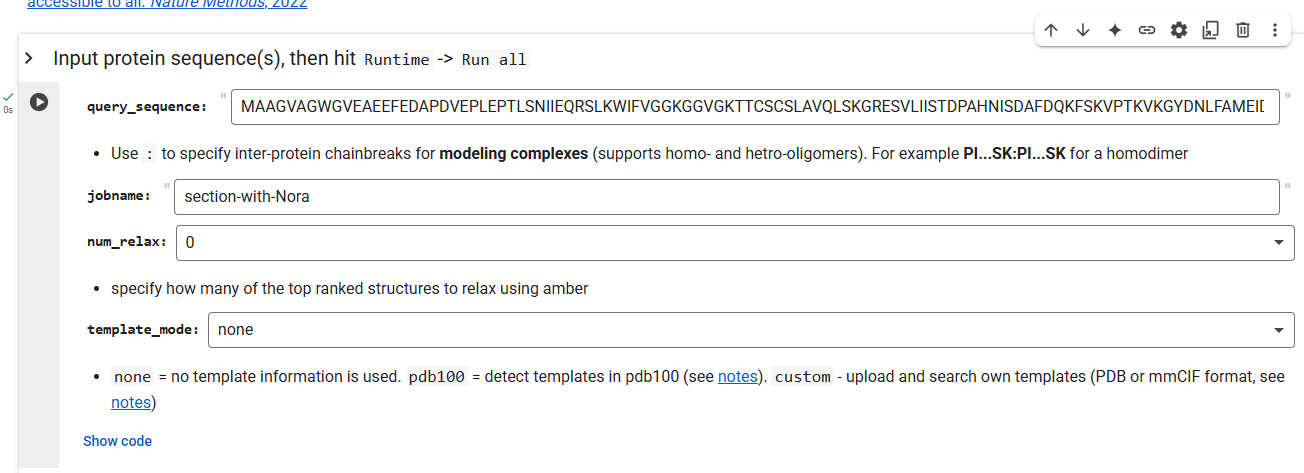



### 🧬 1. **Protein Sequence (query_sequence)**
**English**: This is the code for your protein. Each letter represents an amino acid – the building blocks of proteins.  
**Arabic**: هذا هو رمز البروتين الخاص بك. كل حرف يمثل حمضًا أمينيًا، وهي اللبنات الأساسية للبروتينات.

---

### 🏷️ 2. **Job Name (jobname)**
**English**: Give your prediction a name, like saving a file on your computer.  
**Arabic**: أعطِ المهمة اسمًا، مثل حفظ ملف على جهاز الكمبيوتر الخاص بك.

---

### 🛠️ 3. **Number of Relaxations (num_relax)**
**English**: Tells the program how many top structures it should smooth or polish using a tool called Amber.  
**Arabic**: يُحدد عدد المرات التي يجب فيها تحسين أو تنعيم البنية المتوقعة باستخدام أداة اسمها "Amber".

---

### 🧭 4. **Template Mode (template_mode)**
**English**: Choose whether to use examples from known proteins to help predict your structure.  
- `none`: don’t use any templates  
- `pdb100`: search a known protein database  
- `custom`: upload your own templates  
**Arabic**: اختر ما إذا كنت تريد استخدام أمثلة من بروتينات معروفة للمساعدة في التنبؤ بالبنية.  
- `none`: لا تستخدم قوالب  
- `pdb100`: ابحث في قاعدة بيانات بروتينات  
- `custom`: ارفع قوالبك الخاصة

---



b.

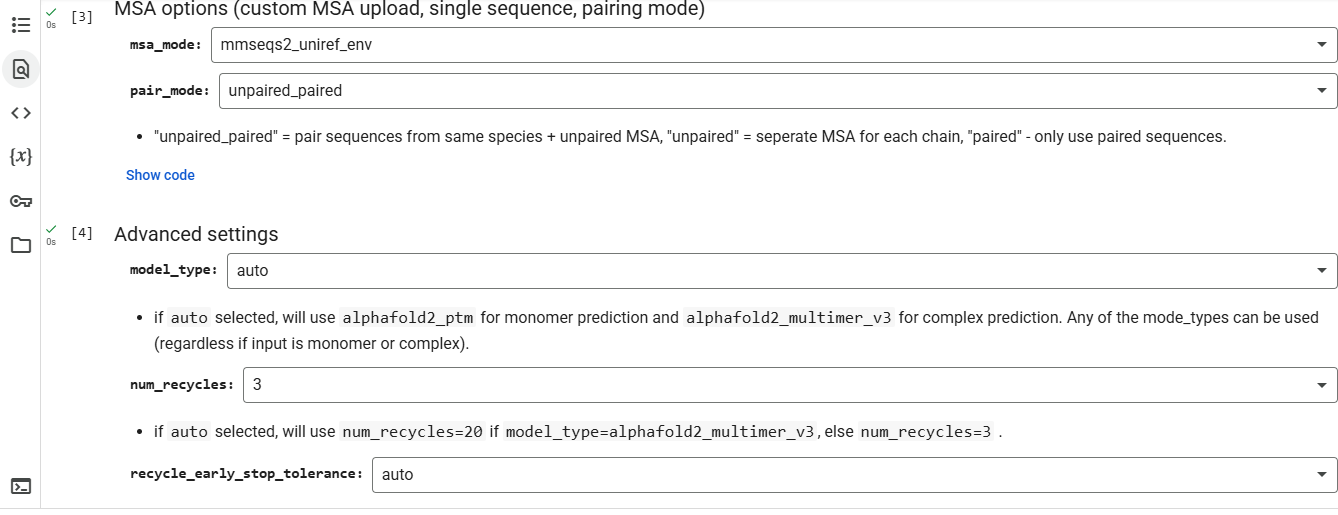

### 🔍 5. **MSA Mode (msa_mode)**
**English**: Helps the model understand your protein better by comparing it to similar ones.  
**Arabic**: يساعد النموذج على فهم بروتينك بشكل أفضل من خلال مقارنته ببروتينات مشابهة.

---

### 👯 6. **Pair Mode (pair_mode)**
**English**: Controls how the chains are matched if you are working with multiple proteins.  
**Arabic**: يتحكم في كيفية مطابقة سلاسل البروتين إذا كنت تعمل على أكثر من بروتين واحد.

---

### ⚙️ 7. **Model Type (model_type)**
**English**: Choose what kind of model you want. If set to `auto`, the program decides based on your input.  
**Arabic**: اختر نوع النموذج الذي تريد استخدامه. إذا تم تحديد `auto`، سيختار البرنامج الأفضل تلقائيًا.

---

### 🔁 8. **Number of Recycles (num_recycles)**
**English**: This tells the model how many times to re-check and refine its prediction.  
**Arabic**: يخبر النموذج بعدد المرات التي يجب أن يعيد فيها التحقق وتحسين التنبؤ.

---

### 🛑 9. **Recycle Early Stop Tolerance**
**English**: If set to `auto`, the model stops early if it’s confident enough.  
**Arabic**: إذا تم تحديده على `auto`، سيتوقف النموذج مبكرًا إذا كان واثقًا من النتيجة.

---



c.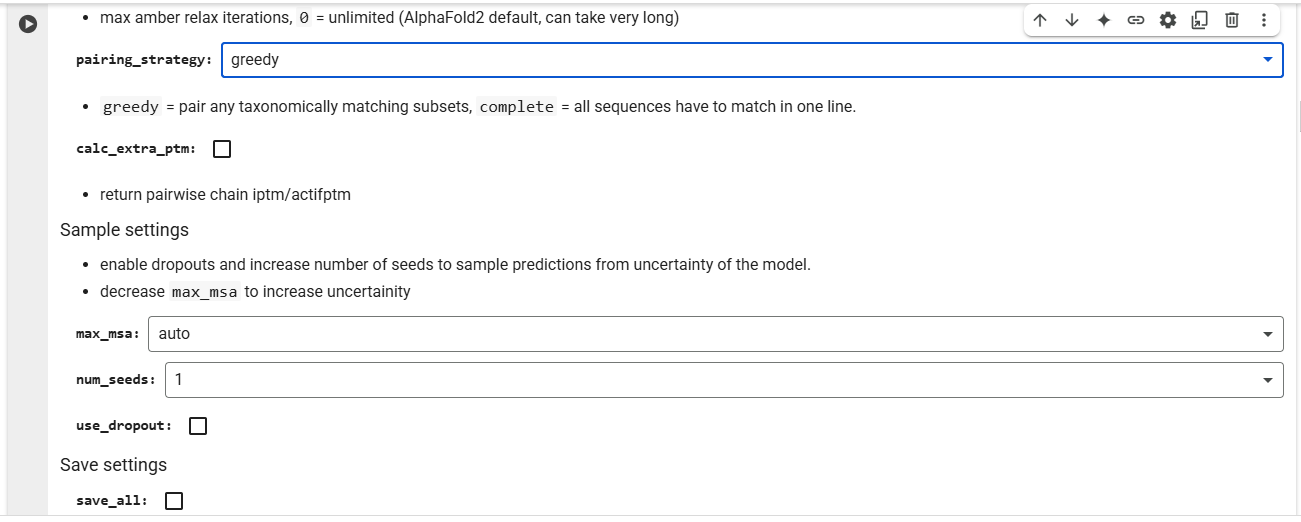

### ⏳ 10. **Relax Max Iterations (relax_max_iterations)**
**English**: Limits how long the program can spend on smoothing the structure.  
**Arabic**: يحدد الحد الأقصى للوقت الذي يمكن أن يستخدمه البرنامج في تحسين البنية.

---

### 🔗 11. **Pairing Strategy (pairing_strategy)**
**English**: Determines how proteins are matched together in complexes.  
- `greedy`: match any that seem to go together  
**Arabic**: يحدد كيفية مطابقة البروتينات معًا في المجمعات.  
- `greedy`: طابق أي بروتينات تبدو متوافقة

---

### 🧪 12. **Calculate Extra PTM (calc_extra_ptm)**
**English**: Adds extra calculations about how protein parts interact.  
**Arabic**: يقوم بحسابات إضافية حول كيفية تفاعل أجزاء البروتين مع بعضها.

---

### 🎲 13. **Sampling Settings (dropout, num_seeds, etc.)**
**English**: Allows the program to try making the protein in slightly different ways to measure uncertainty.  
**Arabic**: يسمح للبرنامج بتجربة بناء البروتين بطرق مختلفة قليلاً لقياس درجة عدم اليقين.

---

### 💾 14. **Save Settings**
**English**: Choose what parts of the results you want to save and where (e.g., Google Drive).  
**Arabic**: اختر ما هي الأجزاء التي تريد حفظها من النتائج، وأين تريد حفظها (مثلاً في Google Drive).

---

### 📸 15. **Display Images**
**English**: Shows pictures of your protein's 3D shape.  
**Arabic**: يعرض صورًا لشكل البروتين ثلاثي الأبعاد.

---




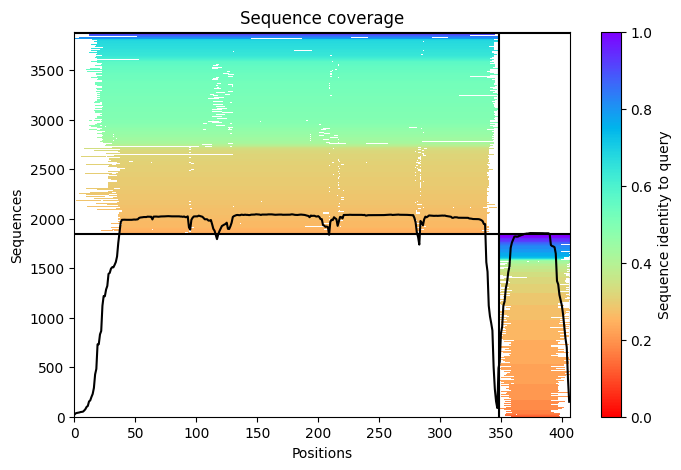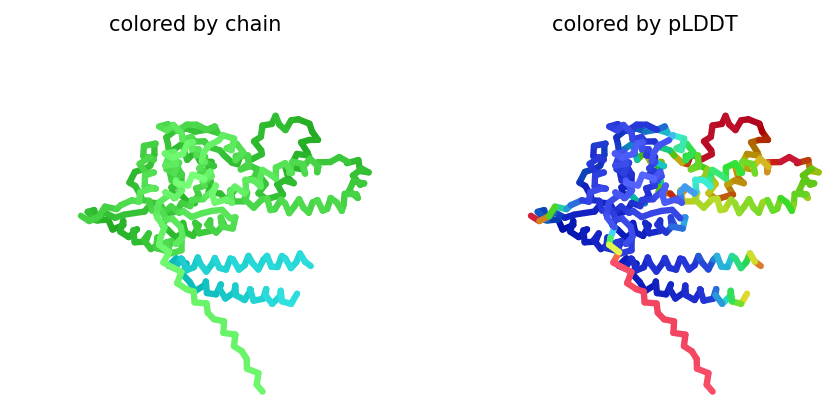

🔎 Parts of the Plot:

📊 X-axis (Positions)
Shows the position of amino acids in your protein (from start to end, e.g., position 0 to 400).

📈 Y-axis (Sequences)
Each row represents one sequence from the database that was aligned to your protein.

More rows = more sequences found that look similar.

🌈 Colors (Right color bar)
Shows how similar those sequences are to your protein.

Blue/Purple (0.8–1.0): Very similar

Green/Orange (0.4–0.7): Somewhat similar

Red (0.0–0.3): Low similarity

⚫ Black Line
Tells you how many sequences matched at each amino acid position.

If the line is high: many sequences support that region.

If the line drops: few or no sequences support that part → may be unreliable.

📌 What to look for:
You want most of the protein to have high sequence coverage (black line stays high).

If there are gaps (like the dip around positions ~340-390), the model may be less confident in that region.


....................



Left: Colored by Chain
This view shows each chain or part of the protein in a different color.

For example:

The green and cyan (light blue) parts are likely different domains or chains.


Helps you understand how the protein is organized structurally.


🔹 Right: Colored by pLDDT
This shows model confidence using the pLDDT score (per-residue confidence).


🟦 Blue → High confidence (pLDDT > 90)

🟩 Green/Yellow → Medium confidence (70–90)

🟥 Orange/Red → Low confidence (pLDDT < 70)
Observation: Your structure has:


High confidence (blue) in the core of the protein


Lower confidence (red) in loop or tail regions, especially the long red segment hanging down (likely disordered or flexible in nature)

# New Section
### 🧱 16. **Show 3D Structure Settings**
**English**: You can choose how to color it, whether to show the side chains, and more.  
**Arabic**: يمكنك اختيار كيفية تلوينه، وهل تريد إظهار السلاسل الجانبية أم لا، والمزيد.

---

### 📈 17. **Plots**
**English**: Shows charts about the model's confidence and quality of prediction.  
**Arabic**: يعرض رسومًا بيانية عن دقة النموذج وجودة التنبؤ.

---

### 📦 18. **Package and Download Results**
**English**: Packs your results into a ZIP file and lets you download it.  
**Arabic**: يجمع نتائجك في ملف مضغوط (ZIP) ويسمح لك بتحميله.

---

#Task

Make the above steps on your seq protein

#ThankYou
The end